# Business Case: Apollo Hospitals - Hypothesis Testing

### About Apollo Hospitals

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.

As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data. You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.

One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

### Buiness Problem

Create insights from the data that which variables are significant in predicting the reason for hospitalization for different regions. How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

### Dataset - <a href="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv">Apollo Hospitals Dataset Link</a>

Column Profiling

 - Age: This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
 - Sex: This is the policy holder's gender, either male or female
 - Viral Load: Viral load refers to the amount of virus in an infected person's blood
 - Severity Level: This is an integer indicating how severe the patient is
 - Smoker: This is yes or no depending on whether the insured regularly smokes tobacco.
 - Region: This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
 - Hospitalization charges: Individual medical costs billed to health insurance

## Overview of the Notebook - Apollo Hospitals DataAnalysis

#### EDA

  - **Loading and inspecting the Dataset**
    - Checking Shape of the Dateset
    - Meaningful Column names
    - Validating Duplicate Records
    - Checking Missing values
    - Unique values (counts) for each Feature
    - Unique values (names) are checked for Features with a unique value count below 100
    - Data validation - High level validation of the data.
    - DataType Validation
  - **Dataset Preparation**
    - Dervied Columns
  - **Univariante Analysis**
     - Numerical Variables
        - Outlier Detection
        - Removal of outliers
      - Categorial variables 
        - Sex
        - Smoker
        - Severity Level
        - AgeCategory
  - **Multi-Variant Analysis**
      - Categorical variables and Numerical variables
  - **Statistical Analysis using**
      - Right Tailed
          - t-statistics
      - Two Tailed test
          - Mann-Whitney U Test
          - t-statistics 
      - Test of Independence
          - A Chi-Square Test
      - Analysis of variance
          - One-Way ANOVA test
      
  - **Summary of final recommendations**

### Importing the required libraries or packages for EDA 

In [1]:
#Importing packages
import numpy as np
import pandas as pd

# Importing matplotlib and seaborn for graphs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm

# Importing Date & Time util modules
from dateutil.parser import parse

## Utility Functions - Used during Analysis

### Missing Value - Calculator

In [2]:
def missingValue(df):
    #Identifying Missing data. Already verified above. To be sure again checking.
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md

### Categorical Variable Analysis 
  - Bar plot - Frequency of feature in percentage
  - Pie Chart

In [3]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'white')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("crest"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(colname, fontsize=14,family = "Comic Sans MS")      
        count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14,'family':"Comic Sans MS"},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1

### Function for Outlier detection
  - Box plot - for checking range of outliers
  - distplot - For checking skewness

In [4]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12,family = "Comic Sans MS")
        sns.boxplot(y = df[var],color='g',ax=ax[rows][0])
        
        # plt.subplot(nrows,mcols,pltcounter+1)
        sns.distplot(df[var],color='g',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='m', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1
    plt.show()

### Function for Bi-variante Analysis
  - Used countplot for the analysis

In [5]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
        string = " based Distribution"
    plt.show()

###  Function Multi variant Analysis for Numericals variables with Categrical and dependent variable
  - Used Boxplot 
  - Point plot

###  Function Bi-variant Analysis for Numericals variables with Categrical and dependent variable

In [6]:
def num_bi_analysis(df,colname,category,groupby,nrows=1,mcols=2,width=20,height=8):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height),squeeze=False)
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, data = df,ax=ax[rows][0])
        sns.lineplot(x=df[category],y=df[var],ax=ax[rows][1],hue=df[groupby]) 
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS")  
        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14,family = "Comic Sans MS")
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14,family = "Comic Sans MS") 
        rows += 1
    plt.show()

### Function for Normality

In [7]:
def shapiro_normality_check(series,alpha=0.05):
    a,p_value = stats.shapiro(apollo_data_v1['hospitalization charges'])
    print("Statistics",a, "p-value",p_value)

    # If p-value is not less than 0.05 then we fail to reject the null hypthesis
    # If p-value is less than .05, we reject the null hypothesis.
    if p_value < alpha:
        print("We have sufficient evidence to say that the sample data does not come from a normal distribution")
    else:
        print("We do not have sufficient evidence to say that sample data does not come from a normal distribution.")
    

In [8]:
def kstest_normality_test(sample,alpha=0.05):
    t_stat,p_val= stats.kstest(sample,'norm')
    print("Test statistics = %.3f,P-value= %.3f" %(t_stat,p_val))
    if p_val > alpha:
        print("Probably Gaussian")
    else:
        print("Probably not Gaussian")

#### Mann-Whiteny U Test
  - A Mann-Whitney U test is used to compare the differences between two samples when the sample distributions are not normally distributed
  - It is considered to be the nonparametric equivalent to the two sample t-test.

In [9]:
# Mann-Whitney U test to determine if there is a statistically significant difference between 2 groups or samples
def mannwhitneyu_test(sample1,sample2,alpha=0.05,alternate="two-sided"):
    t_stat,p_val= stats.mannwhitneyu(sample1,sample2,alternative=alternate)
    print("Test statistics = %.3f,P-value= %.3f" %(t_stat,p_val))
    if p_val > alpha:
        print("Fail to reject Null Hypothesis")
        return True
    else:
        print("Reject Null Hypothesis")
        return False

### Function for test of equal variance

In [10]:
def levene_var_check(sample1, sample2, alpha=0.05):
    a, p_value = stats.levene(sample1, sample2)
    print("p value = ", p_value)
    if p_value < alpha:
        print('We have sufficient evidence to say that the sample data does not have equal variance.')
    else:
        print('We do not have sufficient evidence to say that the sample data does not have equal variance.')

In [11]:
def levene_var_chk_3Sample(sample1, sample2, sample3, alpha=0.05):
    s, p_value = stats.levene(sample1, sample2, sample3)
    print(f'p value = {p_value}')
    if (p_value >= alpha).all():
        print('We do not have sufficient evidence to say that the sample data does not have equal variance.')
    else:
        print('We have sufficient evidence to say that the sample data does not have equal variance.')

## Exploratory Data Analysis

### Loading and inspecting the Dataset

#### Loading the csv file

In [12]:
apollo_data = pd.read_csv("./scaler_apollo_hospitals.csv", index_col=0)

In [13]:
apollo_data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


#### Checking Shape and Column names

In [14]:
apollo_data.shape

(1338, 7)

In [15]:
apollo_data.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

#### Validating Duplicate Records

In [16]:
duplicate = apollo_data[apollo_data.duplicated(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'])]
duplicate

,age,sex,smoker,region,viral load,severity level,hospitalization charges
581,19,male,no,northwest,10.2,0,4099


In [17]:
validate_dup = apollo_data[(apollo_data['age'] == 19) & (apollo_data['hospitalization charges'] == 4099)]
validate_dup

,age,sex,smoker,region,viral load,severity level,hospitalization charges
195,19,male,no,northwest,10.2,0,4099
581,19,male,no,northwest,10.2,0,4099


### Inference
  - One duplicates records found

### Removing the duplicates

In [18]:
apollo_data = apollo_data.drop_duplicates()
apollo_data.shape

(1337, 7)

#### Missing Data Analysis

In [19]:
missingValue(apollo_data).head(5)

Total records =  1337


,Total Missing,In Percent
age,0,0.0
sex,0,0.0
smoker,0,0.0
region,0,0.0
viral load,0,0.0


### Inference
  - No missing value found.

#### Unique values (counts) for each Feature

In [20]:
apollo_data.nunique()

age                          47
sex                           2
smoker                        2
region                        4
viral load                  462
severity level                6
hospitalization charges    1320
dtype: int64

### Unique values (names) are checked for each Features

In [21]:
apollo_data['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [22]:
apollo_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [23]:
apollo_data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [24]:
apollo_data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [25]:
apollo_data['severity level'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

### Inference
 - Data looks fine.

### DataType Validation

In [26]:
apollo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1337 non-null   int64  
 1   sex                      1337 non-null   object 
 2   smoker                   1337 non-null   object 
 3   region                   1337 non-null   object 
 4   viral load               1337 non-null   float64
 5   severity level           1337 non-null   int64  
 6   hospitalization charges  1337 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


### Inference
  - **Severity level** is a categorial variable. Hence updating the dtype for same.

In [27]:
apollo_data['severity level'] = apollo_data['severity level'].astype("category")

### Basic Statistics Analysis - count, min, max, and mean

In [28]:
apollo_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
viral load,1337.0,10.221249,2.033556,5.32,8.76,10.13,11.57,17.71
hospitalization charges,1337.0,33197.806283,30275.900411,2805.00,11866.00,23465.00,41644.00,159426.00


### Inferences

  - Huge difference between max (159426) and min(2805) Hospitalization charges. 
  - Minimum age is 18.

In [29]:
apollo_data.describe(include=['object','category']).T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364
severity level,1337,6,0,573


### Inferences

  - Most hospital patients are **nonsmokers**. 
  - Hospitalizations were more common in males.We should check while univariant analysis.
  - **Health problems are more prevalent in the Southeast**

### Correlation Analysis

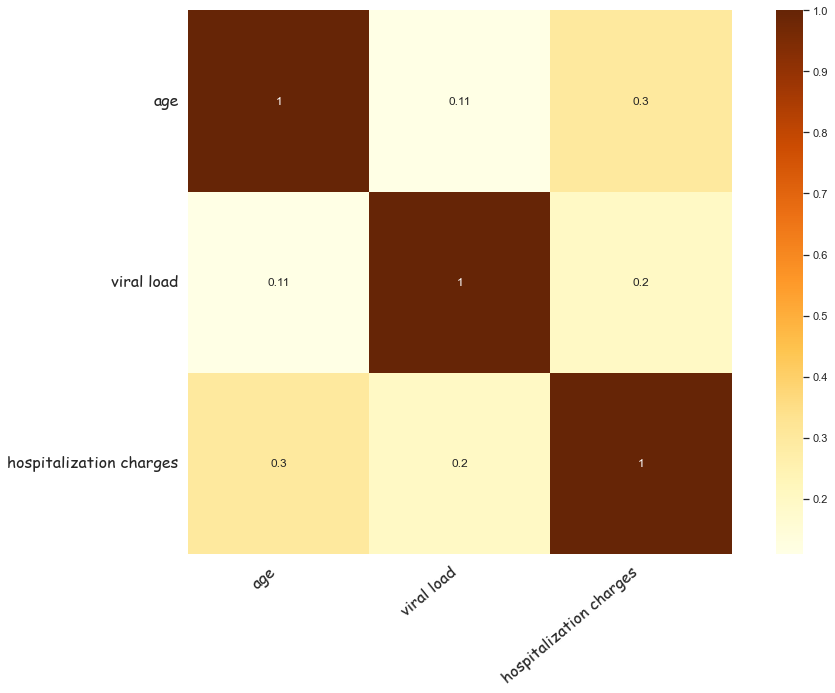

In [30]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(apollo_data.corr(),
            annot=True,cmap='YlOrBr',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

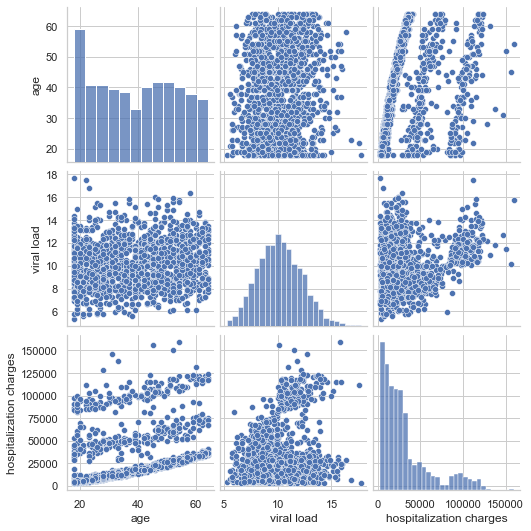

In [31]:
sns.pairplot(apollo_data)

### Inference
  - A correlation can be observed between **age and hospitalization charges**.A deeper dive would be helpful.

## Data Preparation

### Dervied Columns¶
  - Added a new feature from Age
    - **"AgeCategory"** - "0-20s","20-30s","30-40s","40-50s","Above 50s"

### Age Category

In [32]:
bins = [0,20,30,40,50,65]
labels =["0-20s","20-30s","30-40s","40-50s","Above 50s"]
apollo_data['AgeCategory'] = pd.cut(apollo_data['age'], bins,labels=labels)

In [33]:
apollo_data.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,AgeCategory
0,19,female,yes,southwest,9.30,0,42212,0-20s
1,18,male,no,southeast,11.26,1,4314,0-20s
2,28,male,no,southeast,11.00,3,11124,20-30s
3,33,male,no,northwest,7.57,0,54961,30-40s
4,32,male,no,northwest,9.63,0,9667,30-40s


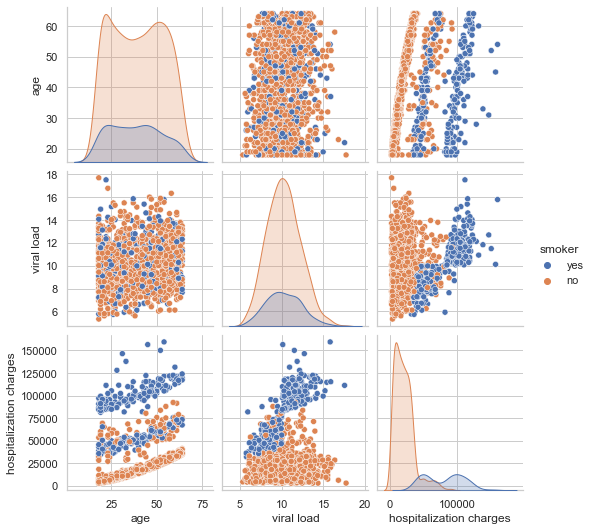

In [34]:
sns.pairplot(apollo_data,hue='smoker')

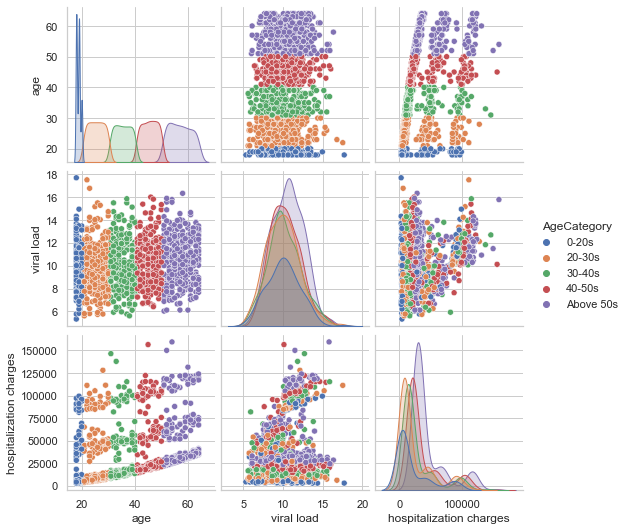

In [35]:
sns.pairplot(apollo_data,hue='AgeCategory')

### Inferences
 - With regard to age & smoker, we can observe some patterns in hospitalization charges & viral loads.

## Univariante Analysis
  - Numerical Variables
    - Outlier Detection
    - Removal of outliers
  - Categorial variables 
    - Sex
    - Smoker
    - Severity Level
    - AgeCategory

### Numerical Variables - Outlier detection
 - hospitalization charges
 - viral load

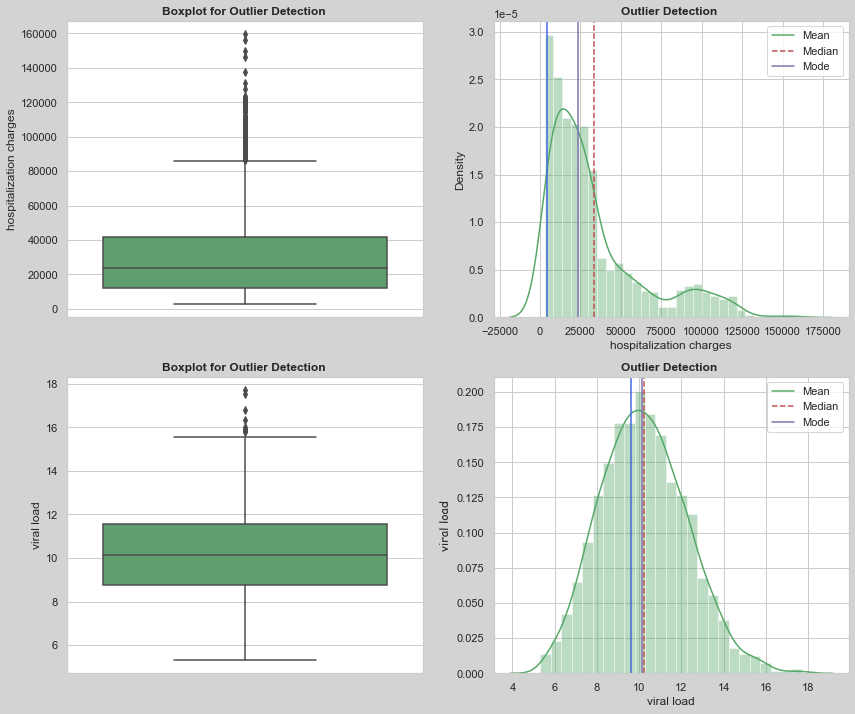

In [36]:
col_num = [ 'hospitalization charges', 'viral load']
outlier_detect(apollo_data,col_num,2,2,14,12)

### Inference
  - **Hospitalization charges** data appears right-skewed and has a lot of outliers.
  - There are some outliers in the **viral load**

### Handling outliers

In [37]:
apollo_data_v1 = apollo_data.copy()

### Removing outliers for Hospitalization charges Feature

In [38]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = apollo_data_v1['hospitalization charges'].quantile(0.75)
Q1 = apollo_data_v1['hospitalization charges'].quantile(0.25)
IQR = Q3-Q1
apollo_data_v1 = apollo_data_v1[(apollo_data_v1['hospitalization charges'] >= Q1 - 1.5*IQR) & (apollo_data_v1['hospitalization charges'] <= Q3 + 1.5*IQR)]


In [39]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = apollo_data_v1['viral load'].quantile(0.75)
Q1 = apollo_data_v1['viral load'].quantile(0.25)
IQR = Q3-Q1
apollo_data_v1 = apollo_data_v1[(apollo_data_v1['viral load'] >= Q1 - 1.5*IQR) & (apollo_data_v1['viral load'] <= Q3 + 1.5*IQR)]


In [40]:
# #outlier treatment
# for i,j in enumerate(list(apollo_data_v1.select_dtypes(np.number).columns)):
#     q1 = apollo_data_v1[j].quantile(0.25)
#     q3 = apollo_data_v1[j].quantile(0.75)
#     apollo_data_v1 = apollo_data_v1[(apollo_data_v1[j] >= q1-1.5*iqr) & (apollo_data_v1[j] <= q3+1.5*iqr)]

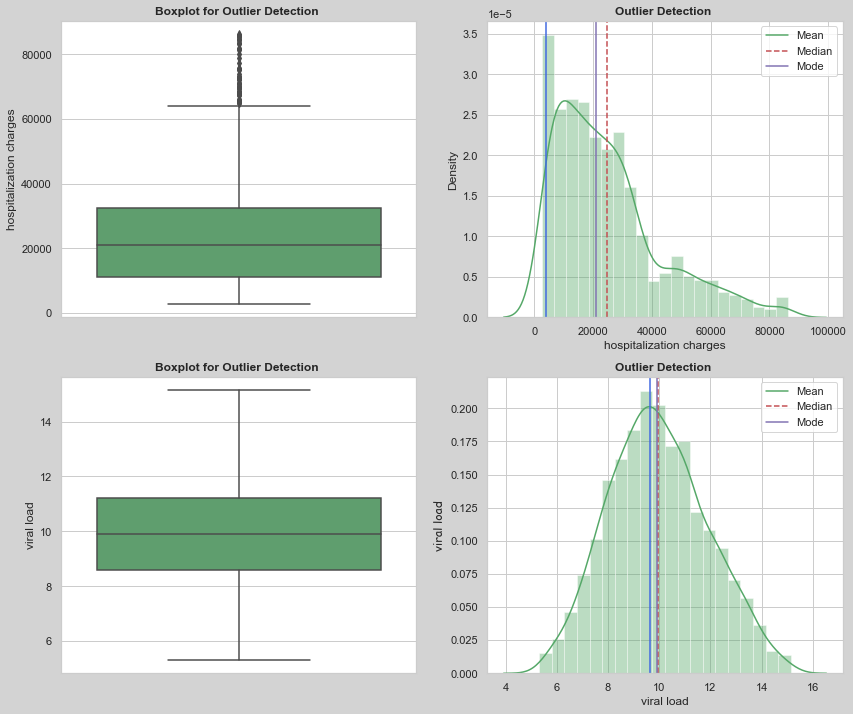

In [41]:
col_num = [ 'hospitalization charges', 'viral load']
outlier_detect(apollo_data_v1,col_num,2,2,14,12)

In [42]:
apollo_data.shape

(1337, 8)

In [43]:
apollo_data_v1.shape

(1185, 8)

### Inferences
 - Still, it appears that the hospitalization charges are right skewed. After eliminating the outliers, the data is reduced by 15%. Hence not removing further outliers.
 - The viral load distribution seems to be fine now.

### Categorical variable Uni-variante Analysis
 - Sex
 - Smoker
 - Region
 - Severity Level
 - AgeCategory

In [44]:
apollo_data_v1.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'AgeCategory'],
      dtype='object')

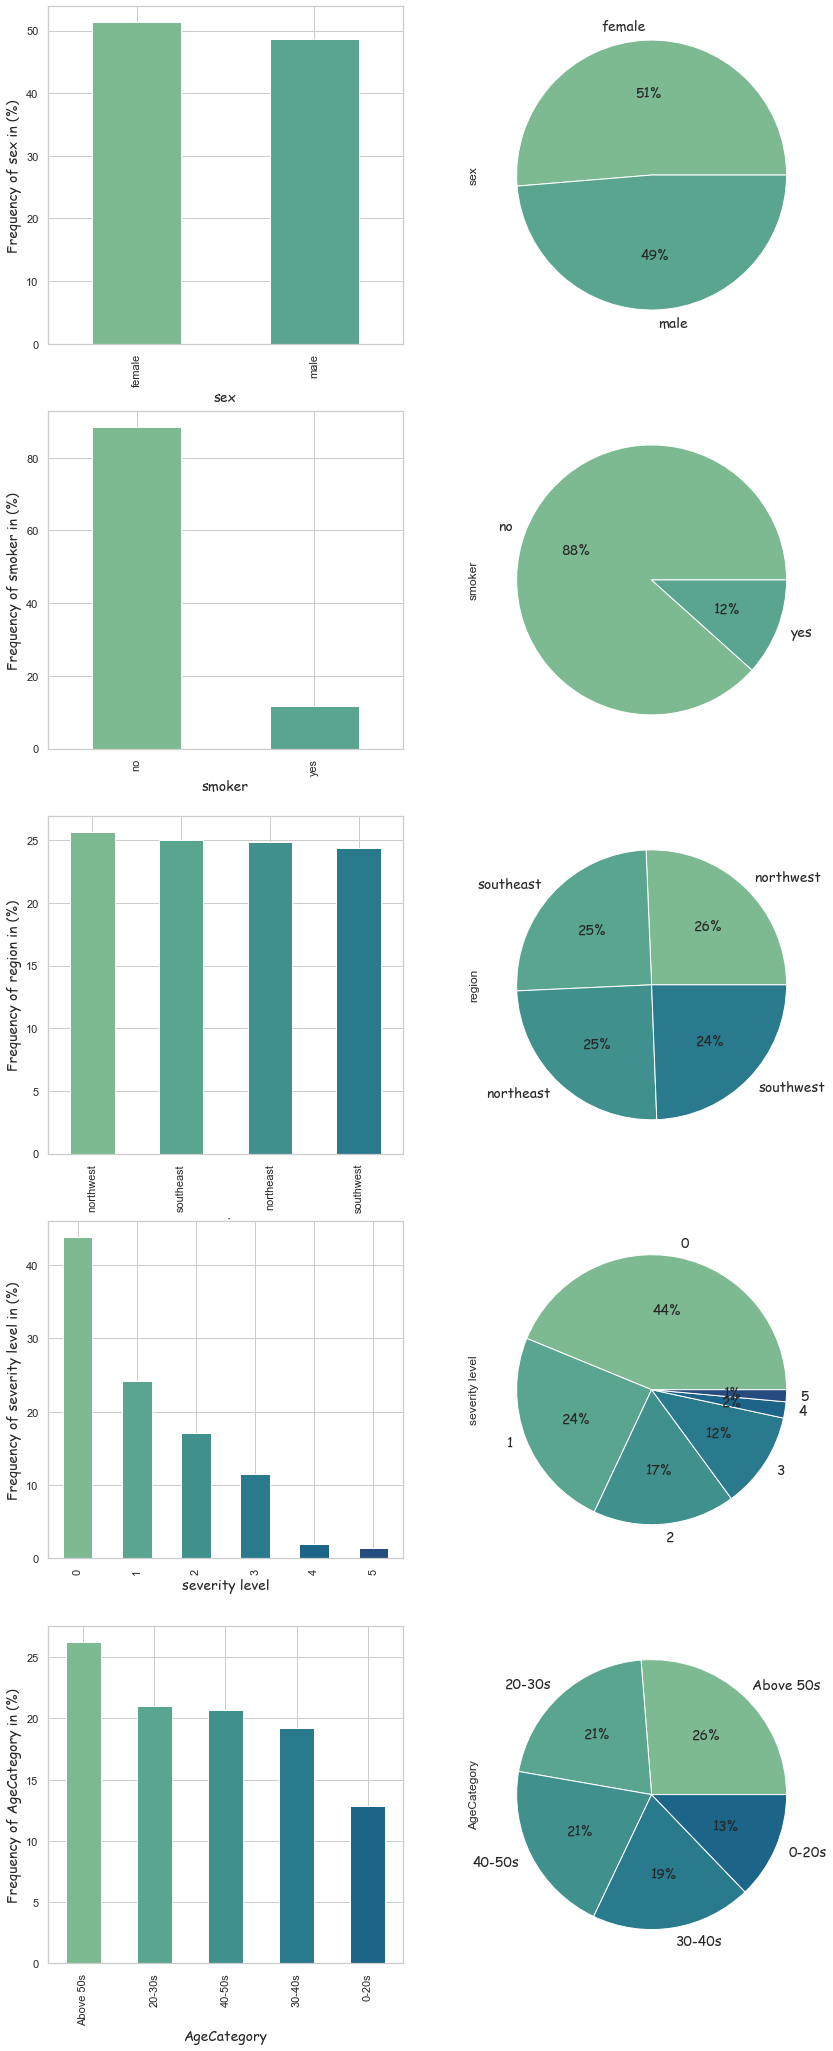

In [45]:
cat_cols = ['sex', 'smoker', 'region', 'severity level','AgeCategory']
cat_analysis(apollo_data_v1,cat_cols,5,2,14,36)

### Inferences
  - Males and females are equally hospitalized.
  - **90%** of hospital patients are **nonsmokers.**
  - Only **4%** of the hospitalized population is in a **critical condition.**

## Bi-Variant Analysis with Smoker
  - Categorical variables
    - Sex
    - Region
    - Severity Level
    - AgeCategory

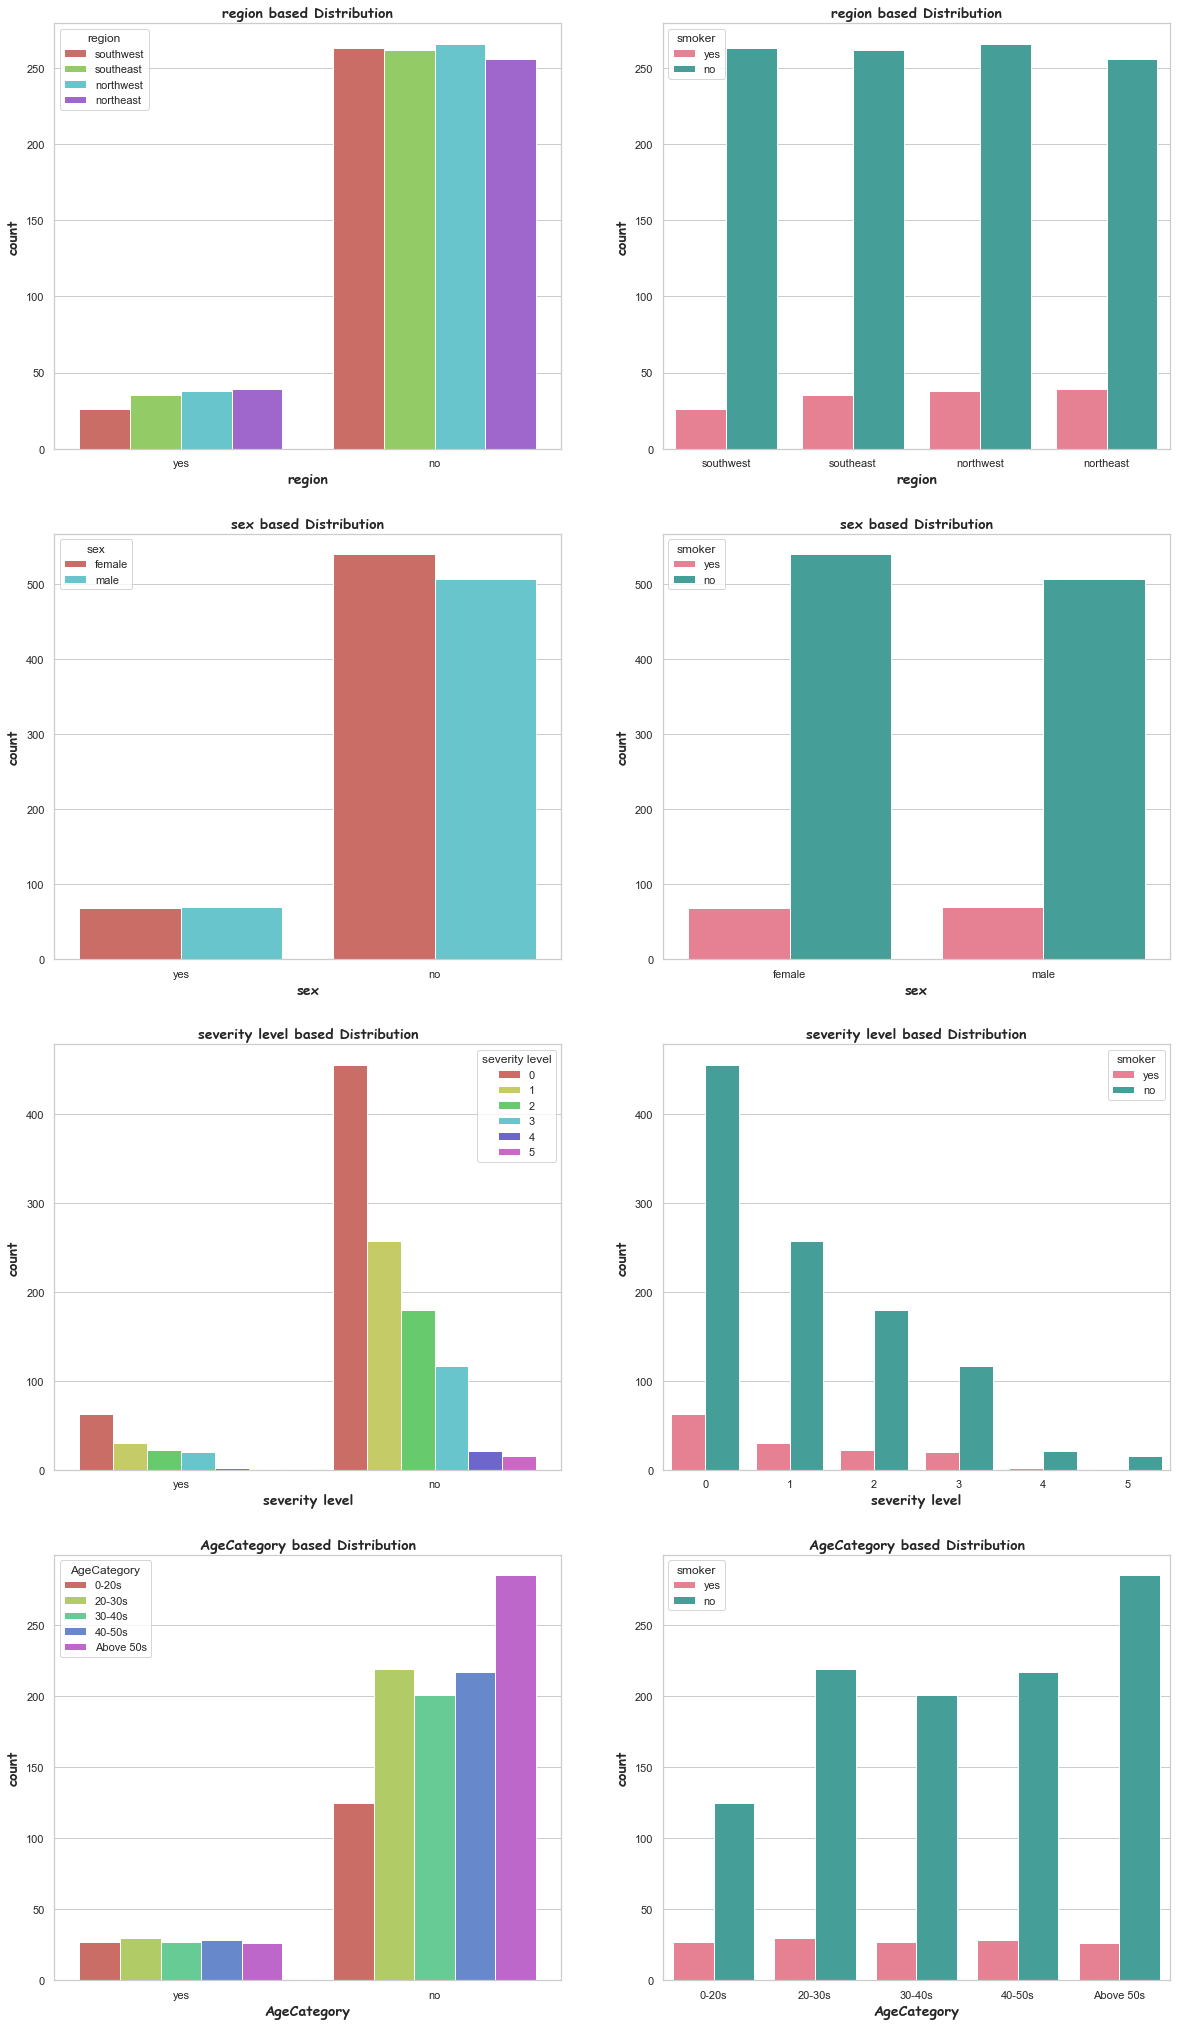

In [46]:
col_names = ['region', 'sex','severity level','AgeCategory']
cat_bi_analysis(apollo_data_v1,col_names,'smoker',4,2,20,36)

### Inference
  - As compared to other age groups, people between 30 and 50 are more likely to smoke and get hosipitalized.
  - As the **age of a person increases,** we see an increase in **hospitalizations.**
  - Approximately equal numbers of patients are coming for treatment from all regions, with the southeast region having slightly more patients.

### Multi-Variant Analysis
  - Categorical variables and Numerical variables 

In [47]:
apollo_data_v1.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges', 'AgeCategory'],
      dtype='object')

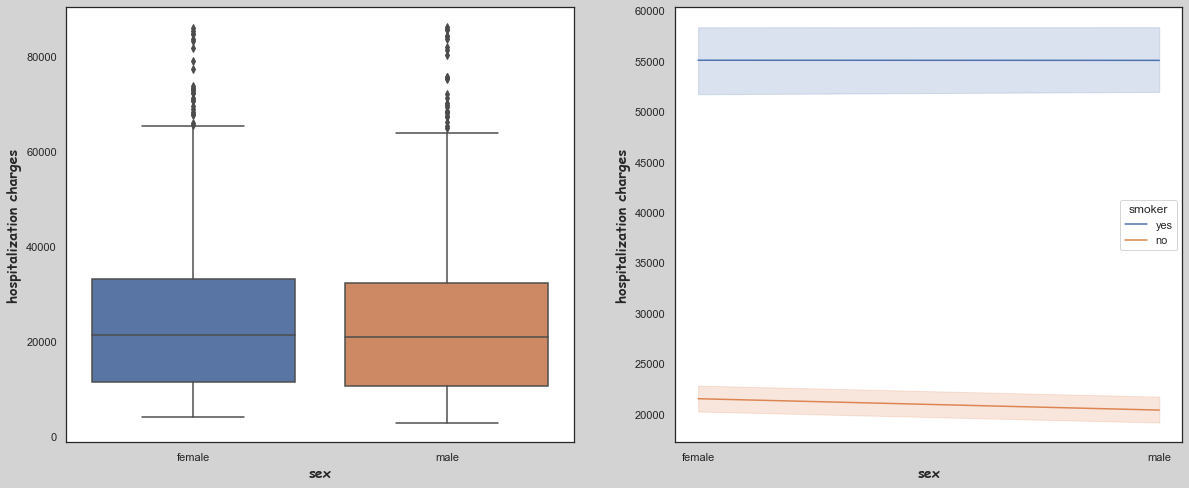

In [48]:
col_num = [ 'hospitalization charges']
num_bi_analysis(apollo_data_v1,col_num,"sex",'smoker')

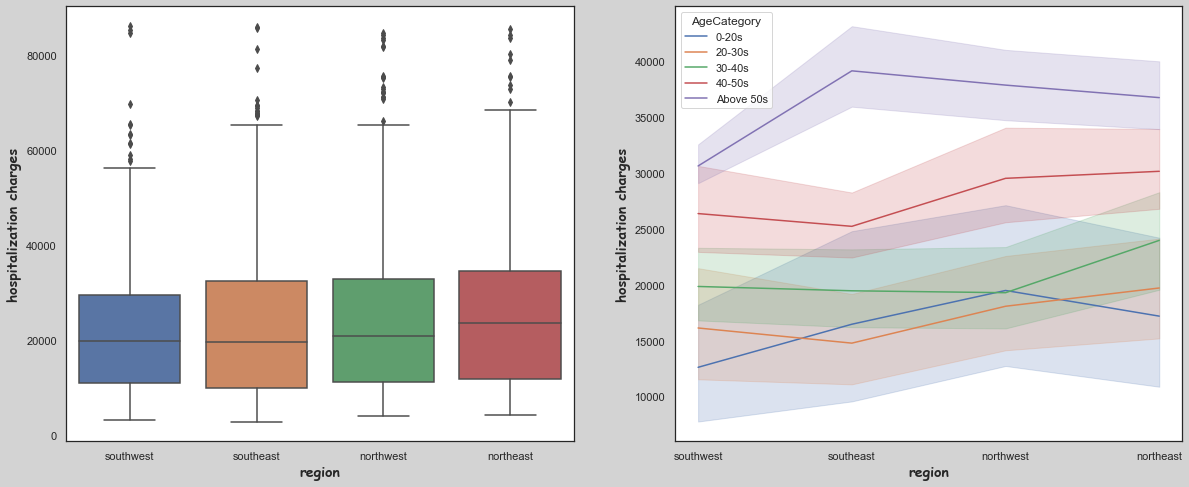

In [49]:
col_num = [ 'hospitalization charges']
num_bi_analysis(apollo_data_v1,col_num,"region",'AgeCategory')

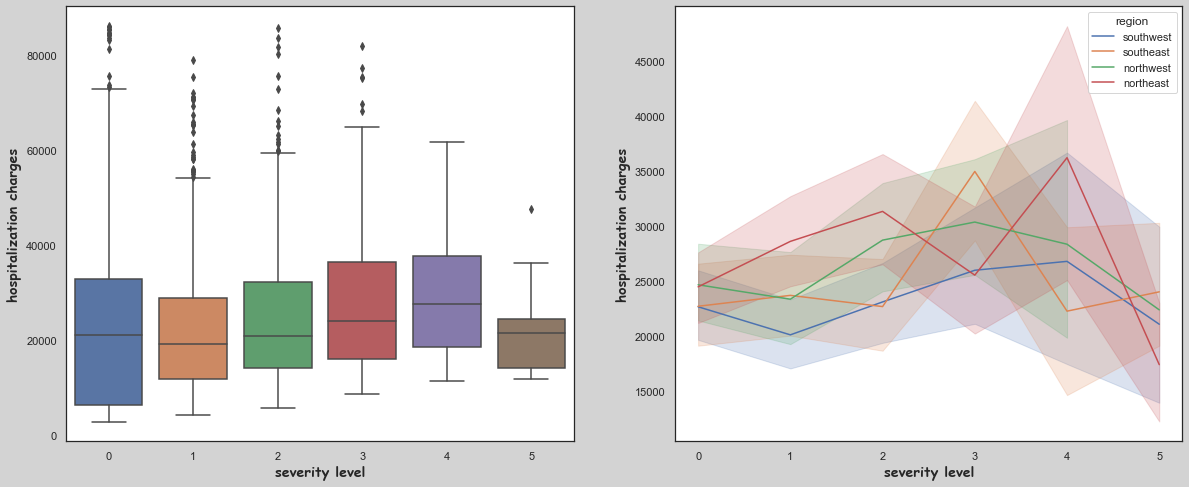

In [50]:
col_num = [ 'hospitalization charges']
num_bi_analysis(apollo_data_v1,col_num,"severity level",'region')

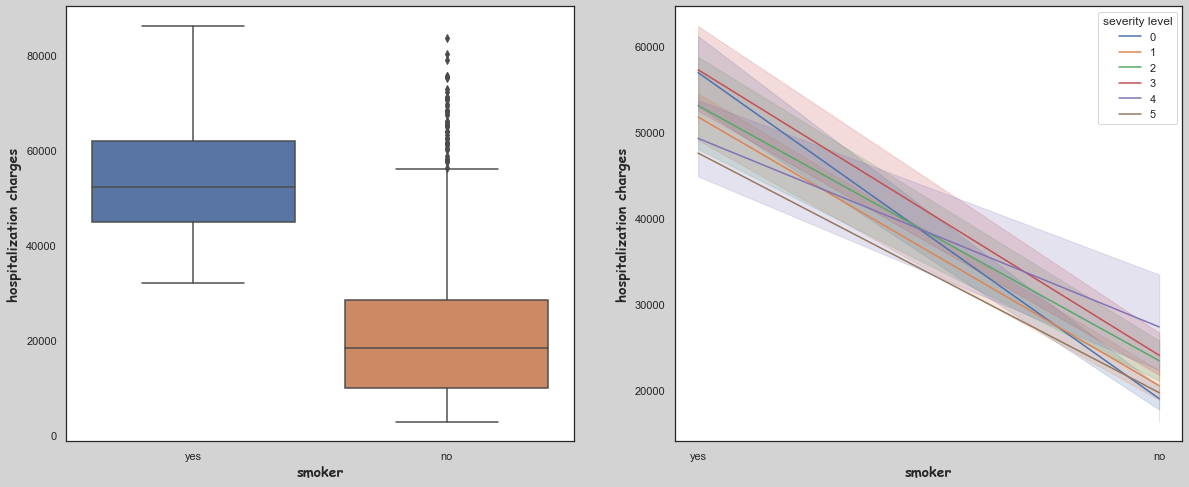

In [51]:
col_num = [ 'hospitalization charges']
num_bi_analysis(apollo_data_v1,col_num,'smoker',"severity level")

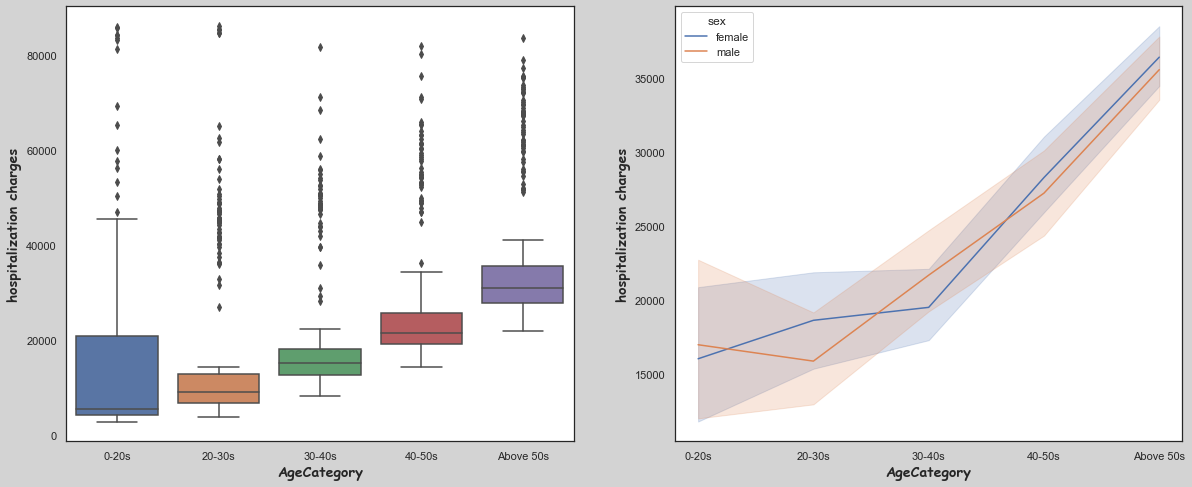

In [52]:
col_num = [ 'hospitalization charges']
num_bi_analysis(apollo_data_v1,col_num,"AgeCategory",'sex')

### Inferences
 - Depending on the region, hospitalization charges do not vary much.
 - Hospitalization costs for smokers tend to be very high
 - On the basis of the box-plot, it appears the median for hospitalization charges are the same for males and females
 - As a patient's **age increases, hospitalizations increase**. Therefore, overall **hospitalization charges are high** for patients over 60.
 - A patient with a severity level 3 or 4 is likely to pay more for hospitalization.
 - **Hospitalization charges with different severity levels do not vary much by median.** In other words, even for less critical patients, hospitalization charges are higher. **It is important that Apollo Hospital reduces such cases.**

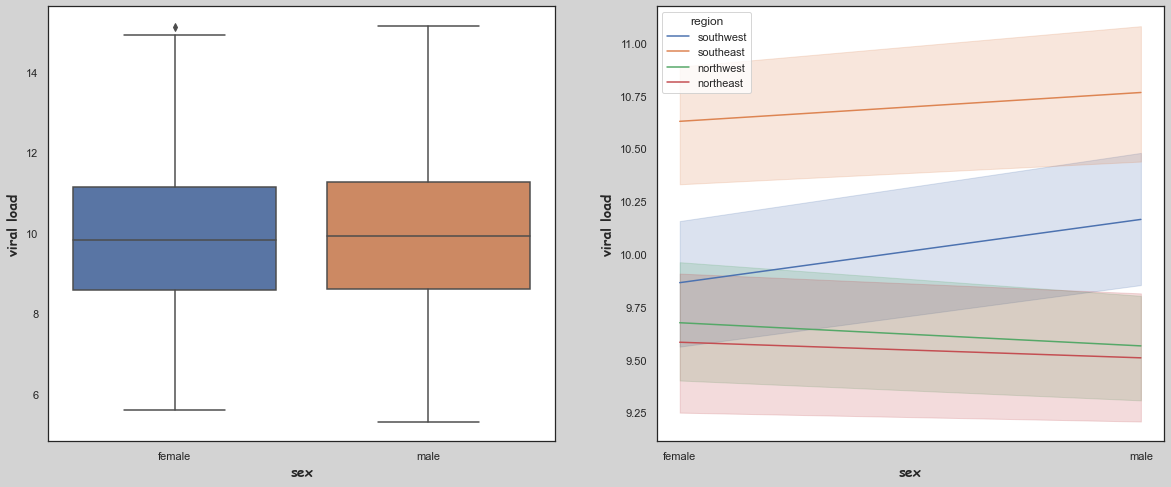

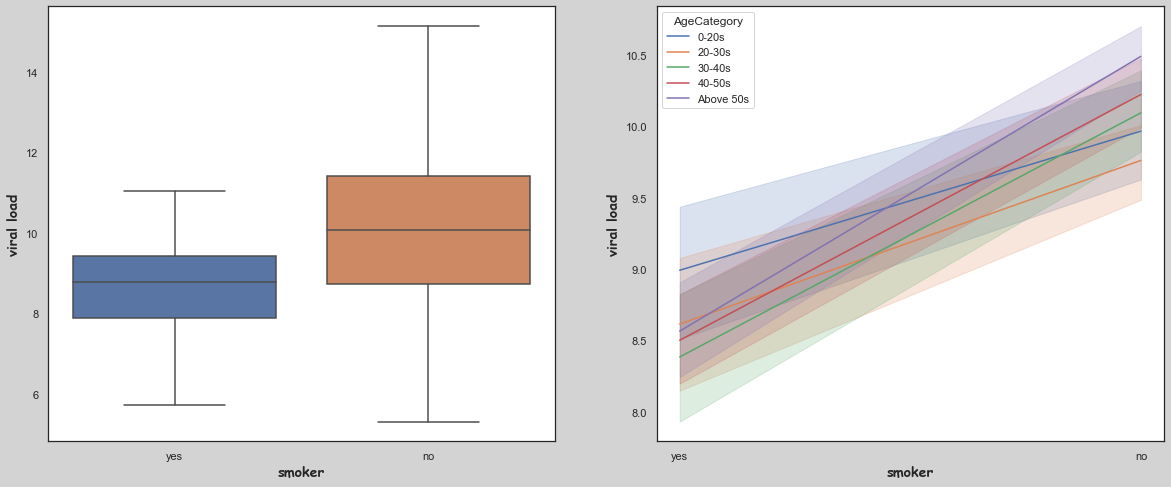

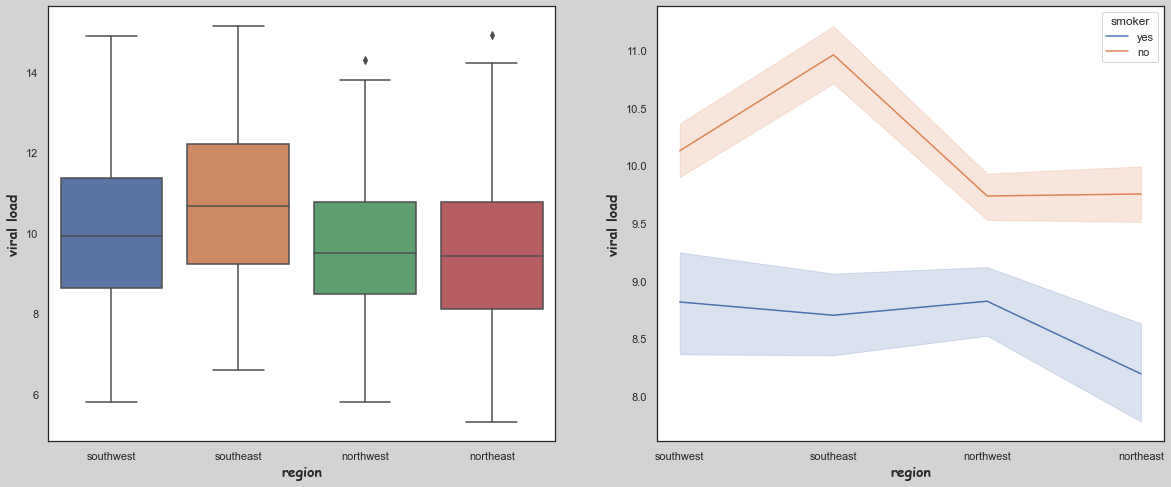

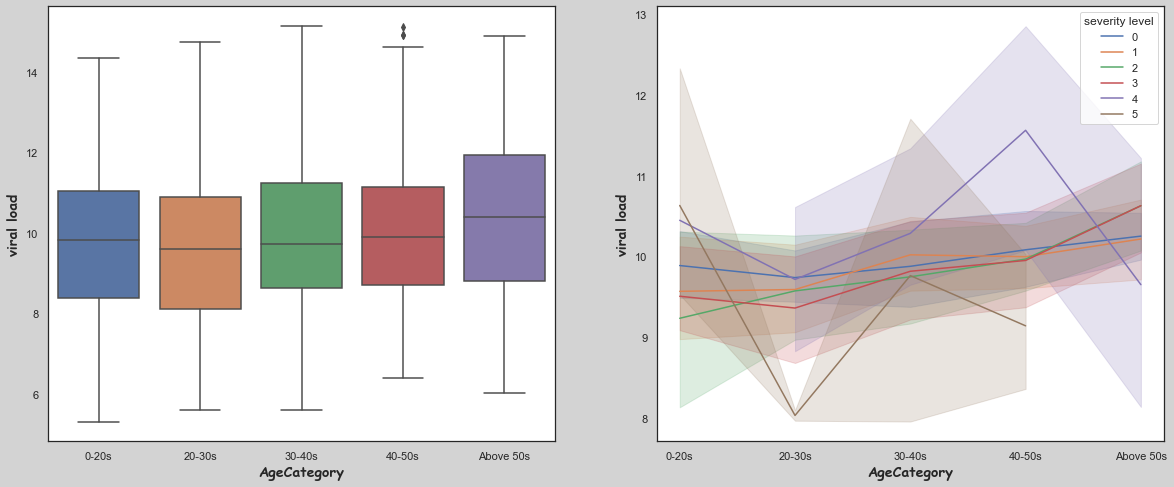

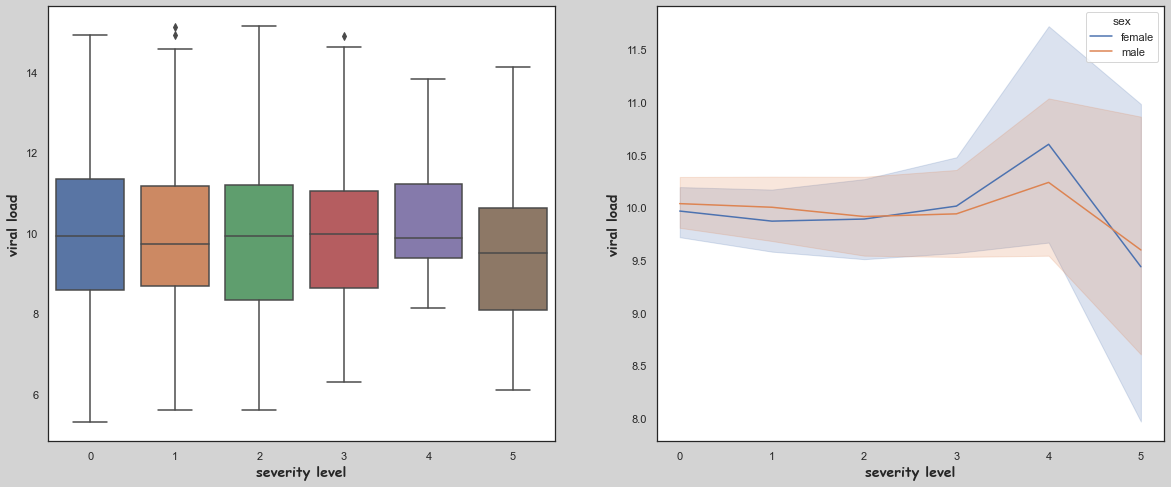

In [53]:
col_num = [ 'viral load']
num_bi_analysis(apollo_data_v1,col_num,"sex",'region')
col_num = [ 'viral load']
num_bi_analysis(apollo_data_v1,col_num,"smoker",'AgeCategory')
col_num = [ 'viral load']
num_bi_analysis(apollo_data_v1,col_num,'region','smoker')
col_num = [ 'viral load']
num_bi_analysis(apollo_data_v1,col_num,'AgeCategory',"severity level")
col_num = [ 'viral load']
num_bi_analysis(apollo_data_v1,col_num,"severity level",'sex')

### Inferences
 - On the basis of the box-plot, it appears the median for viral load are the same for males and females.
 - The viral load of non-smokers is higher than that of smokers
 - Southeast region has a slightly higher viral load as compare to other regions

## Statistical Analysis

 - Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)
 - Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)
 - Is the proportion of smoking significantly different across different regions? (Chi-square)
 - Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same? Explain your answer with statistical evidence (One way Anova)

### Steps followed for Hyothesis testing.

  - Define Null (H0) & Alternate Hypothesis (H1)
  - Validate the assumptions of the test using Histogram, Q-Q plot or statistical methods like levene’s test, Shapiro-wilk test.
      - Normality check
      - Equal Variance
  - Set a significance level (alpha)
  - Calculate test Statistics.
  - Decision to accept or reject null hypothesis.
  - Inference from the analysis

### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

In [54]:
apollo_data_v1.groupby(['smoker'])['hospitalization charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1047.0,20941.024833,14589.325122,2805.0,9972.5,18344.0,28387.5,83680.0
yes,138.0,55035.586957,13792.707698,32074.0,44784.5,52197.0,62048.5,86182.0


In [55]:
apollo_data_v1.shape

(1185, 8)

### Inference
  - Population size (non-smoker) - Non-smokers number 109 out of 1185.
  - Population size (smoker) - Smokers number 1047 out of 1185.

In [58]:
smoker = apollo_data_v1[apollo_data_v1['smoker']== 'yes'] ['hospitalization charges'].sample(200,replace=True)
non_smoker = apollo_data_v1[apollo_data_v1['smoker']== 'no'] ['hospitalization charges'].sample(200,replace=True)

### T-test Right Tailed

### Step 1: Define Null & Alternate Hypothesis

- **H0 : The average hospitalization charges of smokers is less than or equal to non-smoker**
- **H1 : The average hospitalization charges of smokers is greater than non-smokers**


### Step 2: Validate the assumptions
  1. Data values are continuous
  2. Data in each group must follow the **normal probability distribution**
  3. Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
  4. Data in each group must be obtained via random sample from the population. Each individual in the population has an equal probability of being selected in the sample.
  5. The **variances** for the two independent groups are equal
    

### Tests of Assumptions 
  - Shapiro-Wilk & QQ plot 
  - Normality Test & Levene Test for euality of variance

#### Normality test - Shapiro-Wilk with Significance level 0.05

  - H0 : The sample comes from a normal distribution.
  - H1 : The sample is not coming from a normal distribution.

In [115]:
shapiro_normality_check(smoker)

Statistics 0.8948241472244263 p-value 1.0557385583587066e-27
We have sufficient evidence to say that the sample data does not come from a normal distribution


In [116]:
shapiro_normality_check(non_smoker)

Statistics 0.8948241472244263 p-value 1.0557385583587066e-27
We have sufficient evidence to say that the sample data does not come from a normal distribution


#### Normality test - Using qq-plot

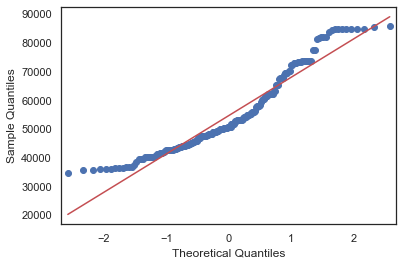

In [117]:
sm.qqplot(smoker, line = 's')
plt.show()

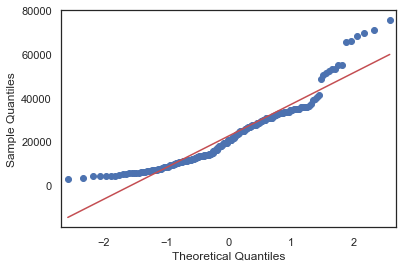

In [118]:
sm.qqplot(non_smoker, line = 's')
plt.show()

### Inferences
 - Based on "Normality test - Shapiro-Wilk", we rejected the null Hypothesis (H0 : The sample comes from a normal distribution.)
 - Based on qq plot also show it is not normally distributed.
 - All distributions fail to meet the normality check

#### Equality of Variance Test - Levene's test with Significance level 0.05

  - H0 : Sample variance is equal.
  - H1 : Sample variance is not equal.

In [119]:
levene_var_check(smoker,non_smoker)

p value =  0.31631564066446793
We do not have sufficient evidence to say that the sample data does not have equal variance.


### Inferences
  - Normality test assumptions are not satisfied by the sample or distribution for t-test but do not have sufficient evidence to say that the sample data does not have equal variance. Thus, we can proceed with the **2 sample right tailed t-test**

### Step 3: Set a significance level (alpha)

In [120]:
alpha = 0.05

### Step 4: Calculate test Statistics

#### Method 1 : - Null Hypothesis is True

In [121]:
t_stat,p_value = stats.ttest_ind(smoker,non_smoker,equal_var=False)

onetail_pvalue = p_value/2
print("Test statistics = {},P value = {}, One Tail P-value = {}".format(t_stat,p_value,onetail_pvalue))

Test statistics = 23.028957161038242,P value = 4.8008286972032435e-75, One Tail P-value = 2.4004143486016218e-75


In [122]:
if onetail_pvalue < alpha:
    print("P-value {} is less that alpha {}".format(onetail_pvalue,alpha))
    print("We have sufficient evidence to reject the Null hypothesis that Average charges of smokers is less than or equal to non-smoker ")
else:
    print("P-value {} is greater that alpha {}".format(onetail_pvalue,alpha))
    print("We do not have sufficient evidence to reject the Null hypothesis that Average charges of smokers is less than or equal to non-smoker ")

P-value 2.4004143486016218e-75 is less that alpha 0.05
We have sufficient evidence to reject the Null hypothesis that Average charges of smokers is less than or equal to non-smoker 


#### Method 2 : -  Alternate Hypothesis is True

In [123]:
t_stat,p_value = stats.ttest_ind(smoker,non_smoker,alternative='greater',equal_var=False)

In [124]:
print("Test statistics = {} , One Tailed P-value = {} as specified that the alternative equal greater which means one tailed test".format(t_stat,p_value))

Test statistics = 23.028957161038242 , One Tailed P-value = 2.4004143486016218e-75 as specified that the alternative equal greater which means one tailed test


### Step 5: Decision to accept or reject null hypothesis.

### Inference
  - We have sufficient evidence to reject the Null hypothesis that Average charges of smokers is less than or equal to non-smoker

### Step 6: Recommendation from the analysis

### Recommendations
 - People who smoke should have a high insurance coverage level because hospitalization charges for smokers tend to be high.
 - Increasing awareness about quitting smoking for better health.

### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males

In [125]:
apollo_data_v1.groupby(['sex'])['viral load'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,608.0,9.940987,1.934166,5.60,8.58,9.84,11.135,15.11
male,577.0,9.994541,1.898547,5.32,8.60,9.93,11.270,15.14


### Inference
  - Population size (female) - Female number 608 out of 1185.
  - Population size (male) - Male number 577 out of 1185.

### Two Tailed test

### Step 1: Define Null & Alternate Hypothesis

- **H0 : No difference in the viral load of females and males**
- **H1 : Difference in the viral load of females and males**

In [126]:
male_viralload = apollo_data_v1[apollo_data_v1['sex']== 'male'] ['viral load'].sample(500,replace = True)
female_viralload = apollo_data_v1[apollo_data_v1['sex']== 'female'] ['viral load'].sample(500,replace = True)

### Step 2: Validate the assumptions
  1. Data values are continuous
  2. Data in each group must follow the **normal probability distribution**
  3. Data values must be independent. Measurements for one observation do not affect measurements for any other observation.
  4. Data in each group must be obtained via random sample from the population. Each individual in the population has an equal probability of being selected in the sample.
  5. The **variances** for the two independent groups are equal

### Tests of Assumptions 
 - **Shapiro-Wilk, kstest, QQ plot & Mann Whitney test - Normality Test**
 - **Levene Test for euality of variance**

#### Normality test - Shapiro-Wilk with Significance level 0.05

  - H0 : The sample comes from a normal distribution.
  - H1 : The sample is not coming from a normal distribution.

In [127]:
shapiro_normality_check(male_viralload)

Statistics 0.8948241472244263 p-value 1.0557385583587066e-27
We have sufficient evidence to say that the sample data does not come from a normal distribution


In [128]:
shapiro_normality_check(female_viralload)

Statistics 0.8948241472244263 p-value 1.0557385583587066e-27
We have sufficient evidence to say that the sample data does not come from a normal distribution


#### Normality test - Kolmogorov-Smirnov test with Significance level 0.05

  - H0 : The sample comes from a normal distribution.
  - H1 : The sample is not coming from a normal distribution.

In [129]:
kstest_normality_test(male_viralload)

Test statistics = 1.000,P-value= 0.000
Probably not Gaussian


In [130]:
kstest_normality_test(female_viralload)

Test statistics = 1.000,P-value= 0.000
Probably not Gaussian


#### Normality test - Using qq-plot

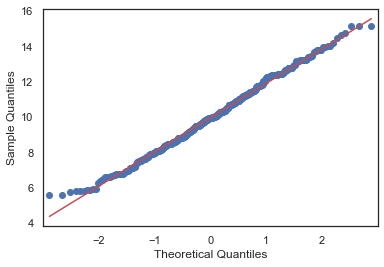

In [131]:
sm.qqplot(male_viralload, line = 's')
plt.show()

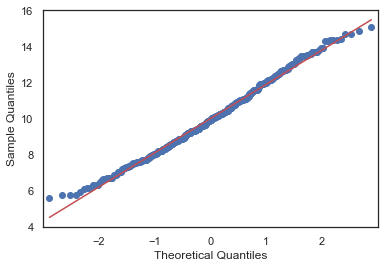

In [132]:
sm.qqplot(female_viralload, line = 's')
plt.show()

### Inferences
 - Based on "Normality test - **Shapiro-Wilk" & "Kolmogorov-Smirnov"** , we rejected the null Hypothesis which means sample is not coming from a normal distribution.
 - Based on **qq plot** its not clear that it is normally distributed.
 - All distributions fail to meet the normality check

#### Equality of Variance Test - Levene's test with Significance level 0.05

  - H0 : Sample variance is equal.
  - H1 : Sample variance is not equal.

In [133]:
levene_var_check(male_viralload,female_viralload)

p value =  0.7353291319746762
We do not have sufficient evidence to say that the sample data does not have equal variance.


### Inferences
  - Normality test assumptions are not satisfied by the sample or distribution for t-test.
  - We do not have sufficient evidence to say that the sample data does not have equal variance.
  
**As the distribution is not normally distributed, we will use the "Mann-Whitney U" non-parametric test**

### Step 3: Set a significance level (alpha)

In [134]:
alpha = 0.05

### Step 4: Calculate test Statistics (Two tailed test)
 - Mann-Whitney U Test
 - t-statistics 

#### Method 1 : - Mann-Whitney U Test
##### **Non-parametric** test to to **compare the differences between two samples** when the sample distributions are not normally distributed

  - H0 : The viral load is equal between males & females
  - H1 : The viral load is not equal between males & females

In [135]:
if mannwhitneyu_test(male_viralload,female_viralload,0.05,'two-sided') == True:
    print("We do not have sufficient evidence to say that viral load is different between males & females")
else:
    print("We have sufficient evidence to say that viral load is different between males & females")

Test statistics = 124054.000,P-value= 0.836
Fail to reject Null Hypothesis
We do not have sufficient evidence to say that viral load is different between males & females


#### Method 2 : -  Alternate Hypothesis is True

In [136]:
t_stat,p_value = stats.ttest_ind(male_viralload,female_viralload,alternative="two-sided")

In [137]:
print("T-statistics is {} & P=value is {}".format(t_stat,p_value))

T-statistics is -0.36461660574192095 & P=value is 0.7154748615850215


In [138]:
if p_value < alpha:
    print("P-value {} is less that alpha {}".format(p_value,alpha))
    print("We have sufficient evidence to reject the Null hypothesis that no difference in the viral load of females and males")
else:
    print("P-value {} is greater that alpha {}".format(p_value,alpha))
    print("We do not have sufficient evidence to reject the Null hypothesis that no difference in the viral load of females and males")

P-value 0.7154748615850215 is greater that alpha 0.05
We do not have sufficient evidence to reject the Null hypothesis that no difference in the viral load of females and males


### Step 5: Decision to accept or reject null hypothesis.

<AxesSubplot:xlabel='viral load', ylabel='Density'>

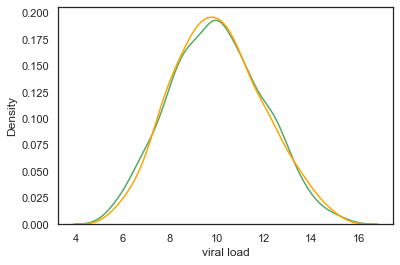

In [139]:
sns.distplot(male_viralload,color='g',hist=False)
sns.distplot(female_viralload,color='orange',hist=False)

### Inference
  - Fail to reject Null hypothesis. We do not have sufficient evidence to reject the Null hypothesis that no difference in the viral load of females and males.

### Is the proportion of smoking significantly different across different regions?

In [140]:
contigency_table = pd.crosstab(apollo_data_v1.region,apollo_data_v1.smoker,margins=True,margins_name='Total')
contigency_table

smoker,no,yes,Total
region,,,
northeast,256,39,295
northwest,266,38,304
southeast,262,35,297
southwest,263,26,289
Total,1047,138,1185


### A Chi-Square Test of Independence
  - As we doing independence test for 2 categorical vaiarbles we are using Chi-squared test.
  

### Step 1: Define Null & Alternate Hypothesis

  - **H0 : Smokers proportions is not significantly different across different regions**
  - **H1 : Smokers proportions different across different regions**

### Step 2: Validate the assumptions

**Assumptions:**
- Both variables are categorical.
- All observations are independent.
- Cells in the contingency table are mutually exclusive.
- Expected value of cells should be 5 or greater in at least 80% of cells.
    - It’s assumed that the expected value of cells in the contingency table should be 5 or greater in at least 80% of cells and that no cell should have an expected value less than 1.

#### Expected value of cells should be 5 or greater in at least 80% of cells & that no cell should have an expected value less than 1.

 - We can use the following formula to calculate the expected values for each cell in the contingency table:
     - Expected value = (row sum * column sum) / table sum.

In [141]:
contigency_table = contigency_table.rename(columns = {'yes':'smoker','no':'non_smoker','Total':'Row_total'})

In [142]:
contigency_table

smoker,non_smoker,smoker,Row_total
region,,,
northeast,256,39,295
northwest,266,38,304
southeast,262,35,297
southwest,263,26,289
Total,1047,138,1185


In [143]:
n = contigency_table.at["Total", "Row_total"]
exp=contigency_table.copy()
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to 6 decimal places to get the maximum available precision:
        v= (((contigency_table.at[x, "Row_total"]) * (contigency_table.at["Total", y])   )/n ).round(2)
        exp.at[x,y]=float(v)

exp = exp.iloc[[0, 1, 2, 3 ], [0, 1]]
exp


smoker,non_smoker,smoker
region,,
northeast,260,34
northwest,268,35
southeast,262,34
southwest,255,33


### Inference 
  - None of the expeted counts is less than 5

### Step 3: Set a significance level (alpha)

In [144]:
alpha = 0.05

### Step 4: Calculate test Statistics (Two tailed test)
 - Chi-square Test

In [145]:
chi2,p_val,deg_of_freedom,exp_freq = stats.chi2_contingency(contigency_table,correction=False)
print("Chi-Square statistics - {} \nP-value: {} \nDegree of Freedom: {} \nExpected Frequencies = {}".format(chi2,p_val,deg_of_freedom,exp_freq))

Chi-Square statistics - 2.9032428948701567 
P-value: 0.9402819404260846 
Degree of Freedom: 8 
Expected Frequencies = [[ 260.64556962   34.35443038  295.        ]
 [ 268.59746835   35.40253165  304.        ]
 [ 262.41265823   34.58734177  297.        ]
 [ 255.3443038    33.6556962   289.        ]
 [1047.          138.         1185.        ]]


### Step 5: Decision to accept or reject null hypothesis.

In [146]:
if p_val >= alpha: 
    print('We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"')
else:
    print('We reject the Null Hypothesis Ho')

We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"


### Infernces 
  - We can conclude that smokers proportion is not significantly different in different regions"

### Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same?

In [147]:
apollo_data_v1[apollo_data_v1['sex'] == 'female'].groupby('severity level')['viral load'].describe().head(3)

,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,269.0,9.967212,1.934359,5.76,8.61,9.700,11.1300,14.92
1,146.0,9.871507,1.871249,5.60,8.60,9.655,11.1025,15.11
2,105.0,9.891429,2.027979,5.73,8.33,10.050,11.1800,14.45


### Inference
  - Population size (female with severity level 0) - 269 out of 1185.
  - Population size (female with severity level 1) - 146 out of 1185.
  - Population size (female with severity level 2) - 105 out of 1185.

#### Converting categorical variable "severity level" to indicator variables values 

In [148]:
apollo_data_v1['severity level'] = apollo_data_v1['severity level'].astype('int64')
apollo_data_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1185 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      1185 non-null   int64   
 1   sex                      1185 non-null   object  
 2   smoker                   1185 non-null   object  
 3   region                   1185 non-null   object  
 4   viral load               1185 non-null   float64 
 5   severity level           1185 non-null   int64   
 6   hospitalization charges  1185 non-null   int64   
 7   AgeCategory              1185 non-null   category
dtypes: category(1), float64(1), int64(3), object(3)
memory usage: 107.7+ KB


In [149]:
apollo_data_f_severe = apollo_data_v1[apollo_data_v1['sex']=='female'].loc[apollo_data_v1[apollo_data_v1['sex']=='female']['severity level']<=2]
apollo_data_f_severe.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges,AgeCategory
0,19,female,yes,southwest,9.30,0,42212,0-20s
5,31,female,no,southeast,8.58,0,9392,30-40s
6,46,female,no,southeast,11.15,1,20601,40-50s
9,60,female,no,northwest,8.61,0,72308,Above 50s
11,62,female,yes,southeast,8.76,0,69522,Above 50s


### One-Way ANOVA Test (Analysis of variance)
  - As above problem is a analysis of variance we will be using One-way ANOVA test - which compares the means of three or more independent groups to determine if there is a statistically significant difference between the corresponding population means.

### Step 1: Define Null & Alternate Hypothesis

  - **H0 : The mean viral load of women with no serverity, 1-severity and 2-severity level is same.**
  - **H1 : Atleast one of mean viral load of women is not same**

### Step 2: Validate the assumptions

**Assumptions:**
- **Normality** – Each sample was drawn from a normally distributed population
- **Sample independence** – The observations in each group are independent of each other and the observations within groups were obtained by a random sample.
- **Equal Variances** – The variances of the populations that the samples come from are equal.

### Tests of Assumptions 
 - **Shapiro-Wilk, kstest, QQ plot & Mann Whitney test - Normality Test**
 - **Levene Test for euality of variance**

#### Normality test - Shapiro-Wilk with Significance level 0.05

  - H0 : The sample comes from a normal distribution.
  - H1 : The sample is not coming from a normal distribution.

In [150]:
apollo_data_f_severe.shape

(520, 8)

In [151]:
f_sev_0_1_2_viral_load = apollo_data_f_severe['viral load'].sample(100, replace = True)

In [152]:
shapiro_normality_check(f_sev_0_1_2_viral_load)

Statistics 0.8948241472244263 p-value 1.0557385583587066e-27
We have sufficient evidence to say that the sample data does not come from a normal distribution


#### Normality test - using QQ plot

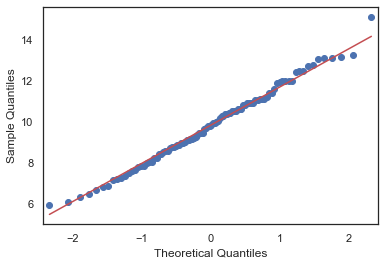

In [153]:
sm.qqplot(f_sev_0_1_2_viral_load, line = 's')
plt.show()

#### Normality test - Kolmogorov-Smirnov test with Significance level 0.05

  - H0 : The sample comes from a normal distribution.
  - H1 : The sample is not coming from a normal distribution.

In [154]:
kstest_normality_test(f_sev_0_1_2_viral_load)

Test statistics = 1.000,P-value= 0.000
Probably not Gaussian


### Inferences
 - Based on "Normality test - **Shapiro-Wilk" & "Kolmogorov-Smirnov"** , we rejected the null Hypothesis which means sample is not coming from a normal distribution.
 - Based on **qq plot** its looks like that it is normally distributed.

#### Equality of Variance Test - Levene's test with Significance level 0.05

  - H0 : Sample variance is equal.
  - H1 : Sample variance is not equal.

In [155]:
sample_0 = apollo_data_f_severe[apollo_data_f_severe['severity level'] == 0 ]['viral load'].sample(100,replace = True)
sample_1 = apollo_data_f_severe[apollo_data_f_severe['severity level'] == 1 ]['viral load'].sample(100,replace = True)
sample_2 = apollo_data_f_severe[apollo_data_f_severe['severity level'] == 2 ]['viral load'].sample(100,replace = True)

In [156]:
levene_var_chk_3Sample(sample_0,sample_1,sample_2)

p value = 0.5089141237490791
We do not have sufficient evidence to say that the sample data does not have equal variance.


### Inferences
  - Normality test assumptions are not satisfied by the sample or distribution for ANOVA test.
  - We do not have sufficient evidence to say that the sample data does not have equal variance.
  
**As the distribution is not normally distributed, we will still use "One-Way ANOVA test as ANOVA is not affect very much by normality voilation of the assumption".**

### Step 3: Set a significance level (alpha)

In [157]:
alpha = 0.05

### Step 4: Calculate test Statistics
 - One-Way ANOVA test

In [158]:
anova_test_stat,p_val = stats.f_oneway(sample_0,sample_1,sample_2)
print("ANOVA test Stats = {}, P-value = {} ".format(anova_test_stat,p_val))
alpha = 0.05
if p_value >= alpha: 
    print('We do not have sufficient evidence to say the viral load of females with \'no severity, 1 & 2 severity level\' is same')
else:
    print('We have sufficient evidence to say that Atleast one of mean viral load of women is not same ')

ANOVA test Stats = 0.9710020944980482, P-value = 0.3799022474585838 
We do not have sufficient evidence to say the viral load of females with 'no severity, 1 & 2 severity level' is same


### Step 5: Decision to accept or reject null hypothesis.

### Inference
  - The results of the One-Way ANOVA test indicate that the viral load of women without sickness severity level, with sickness severity level 1 and with sickness severity level 2 is the same.

## Inferences & Recommendations 

### Inferences 

#### Based on EDA

  - As a patient's age increases, hospitalizations increase. Therefore, overall hospitalization charges are high for patients over 60.
  - Hospitalization charges with different severity levels do not vary much by median. In other words, even for less critical patients, hospitalization charges are higher. It is important that Apollo Hospital reduces such cases.
  - Approximately equal numbers of patients are coming for treatment from all regions, with the southeast region having slightly more patients
  - Males and females are equally hospitalized.
  - Only 4% of the hospitalized population is in a critical condition.
  - 90% of hospital patients are **nonsmokers** but Hospitalization costs for smokers tend to be very high.
  - Depending on the region, hospitalization charges do not vary much.
  - The viral load of non-smokers is higher than that of smokers

#### Based on Statistical Analysis
  - We have sufficient evidence to reject the Null hypothesis that Average charges of smokers is less than or equal to non-smoker
  - Fail to reject Null hypothesis. We do not have sufficient evidence to reject the Null hypothesis that no difference in the viral load of females and males.
  - We fail to reject the Null Hypothesis Ho and thus we can conclude that smokers proportion is not significantly different in different regions"
  - The results of the One-Way ANOVA test indicate that the viral load of women without sickness severity level, with sickness severity level 1 and with sickness severity level 2 is the same.

### Recommendations

- The hospital should suggest high insurance coverage to people as their ages increase. Provide this information to the insurance companies as well so that they can offer better insurance coverage.

- Using the above analysis, we found that hospitalization charges are higher even for patients who are less critical. The hospital should ensure such cases can be reduced in the future. Only necessary patients should be admitted.

- As a result of the analysis, smokers tend to incur very high hospitalization costs. The Apollo hospitals should run an awareness program to prevent smoking and its after effects.

- There is a high risk of viral infection in non-smokers. Females giving birth may contribute to this risk. The Apollo Hospital should ensure certain tests can identify viral infections or viral loads in non-smokers.

- People who smoke should have a high insurance coverage level because hospitalization charges for smokers tend to be high.
